# Data Preprocessing

In [408]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

from scipy.stats import norm
from scipy import stats
from sklearn.impute import KNNImputer


In [409]:
# read csv file
df=pd.read_csv("CarsRatings.csv" , index_col="Unnamed: 0")
df.head() 


,Rate,Adult Occupant,Child Occupant,Vulnerable Road Users,Safety Assist,Tested Model,Body Type,Year Of Publication,Kerb Weight,VIN From Which Rating Applies,...,Isofix/i-Size-Rear,Integrated Child Seat-Rear,Airbag cut-off switch-Rear,Seatbelt Reminder-Rear,Active Bonnet,AEB Vulnerable Road Users,AEB Pedestrian - Reverse,AEB Car-to-Car,Speed Assistance,Lane Assist System
1,5,84%,89%,81%,81%,"Jeep Grand Cherokee 2.0 PHEV 'Overland', LHD",- 5 door SUV,2022,2532kg,- all Grand Cherokees,...,Fitted_Standard,Not_Available,Not_Applicable,Fitted_Standard,Not_Available,Fitted_Standard,Not_Available,Fitted_Standard,Fitted_Standard,Fitted_Standard
2,5,87%,87%,68%,88%,"CHERY OMODA5 1.6T, LHD",- SUV,2022,1423kg,- all OMODA5,...,Fitted_Standard,Not_Available,Not_Applicable,Fitted_Standard,Not_Available,Fitted_Standard,Fitted_Standard,Fitted_Standard,Fitted_Standard,Fitted_Standard
3,4,75%,84%,70%,69%,"Ford Puma 1.0 MHEV, 'Titanium', LHD",- 5 door SUV,2022,1334kg,- all Ford Pumas,...,Fitted_Standard,Not_Available,Not_Applicable,Fitted_Standard,Not_Available,Fitted_Standard,Not_Available,Fitted_Standard,Fitted_Standard,Fitted_Standard
4,5,84%,90%,74%,84%,VW Amarok 2.0/Ford Ranger 3.0,- Pick-Up,2022,2434kg,- all double cabin Rangers,...,Fitted_Standard,Not_Available,Not_Applicable,Fitted_Standard,Not_Available,Fitted_Standard,Fitted_Standard,Fitted_Standard,Fitted_Standard,Fitted_Standard
5,5,84%,89%,71%,85%,Discovery Sport,- 5 door SUV,2022,2123kg,- SALCP2FX2PH325732,...,Fitted_Standard,Not_Available,Not_Applicable,Fitted_Standard,Fitted_Standard,Fitted_Standard,Not_Available,Fitted_Standard,Fitted_Standard,Fitted_Standard


In [410]:
# replace every nan as string to np.nan
df.replace("nan",np.nan,inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 1 to 311
Data columns (total 53 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Rate                             311 non-null    int64 
 1   Adult Occupant                   311 non-null    object
 2   Child Occupant                   311 non-null    object
 3   Vulnerable Road Users            218 non-null    object
 4   Safety Assist                    311 non-null    object
 5   Tested Model                     311 non-null    object
 6   Body Type                        311 non-null    object
 7   Year Of Publication              311 non-null    int64 
 8   Kerb Weight                      311 non-null    object
 9   VIN From Which Rating Applies    311 non-null    object
 10  Class                            311 non-null    object
 11  Front Airbag-Driver              311 non-null    object
 12  Belt Pretensioner-Driver         311

In [411]:
# TO-DO: remove  '%' in [Adult Occupant	Child Occupant,	Vulnerable Road Users,	Safety Assist] and change dtype to int
cols=['Adult Occupant', 'Child Occupant', 'Vulnerable Road Users', 'Safety Assist']

df['Adult Occupant']=df['Adult Occupant'].str.replace('%','')
df['Child Occupant']=df['Child Occupant'].str.replace('%','')
df['Safety Assist']=df['Safety Assist'].str.replace('%','')
df['Vulnerable Road Users']=df['Vulnerable Road Users'].str.replace('%','')
df['Kerb Weight']=df['Kerb Weight'].str.replace('kg','')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 1 to 311
Data columns (total 53 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Rate                             311 non-null    int64 
 1   Adult Occupant                   311 non-null    object
 2   Child Occupant                   311 non-null    object
 3   Vulnerable Road Users            218 non-null    object
 4   Safety Assist                    311 non-null    object
 5   Tested Model                     311 non-null    object
 6   Body Type                        311 non-null    object
 7   Year Of Publication              311 non-null    int64 
 8   Kerb Weight                      311 non-null    object
 9   VIN From Which Rating Applies    311 non-null    object
 10  Class                            311 non-null    object
 11  Front Airbag-Driver              311 non-null    object
 12  Belt Pretensioner-Driver         311

In [412]:
df

,Rate,Adult Occupant,Child Occupant,Vulnerable Road Users,Safety Assist,Tested Model,Body Type,Year Of Publication,Kerb Weight,VIN From Which Rating Applies,...,Isofix/i-Size-Rear,Integrated Child Seat-Rear,Airbag cut-off switch-Rear,Seatbelt Reminder-Rear,Active Bonnet,AEB Vulnerable Road Users,AEB Pedestrian - Reverse,AEB Car-to-Car,Speed Assistance,Lane Assist System
1,5,84,89,81,81,"Jeep Grand Cherokee 2.0 PHEV 'Overland', LHD",- 5 door SUV,2022,2532,- all Grand Cherokees,...,Fitted_Standard,Not_Available,Not_Applicable,Fitted_Standard,Not_Available,Fitted_Standard,Not_Available,Fitted_Standard,Fitted_Standard,Fitted_Standard
2,5,87,87,68,88,"CHERY OMODA5 1.6T, LHD",- SUV,2022,1423,- all OMODA5,...,Fitted_Standard,Not_Available,Not_Applicable,Fitted_Standard,Not_Available,Fitted_Standard,Fitted_Standard,Fitted_Standard,Fitted_Standard,Fitted_Standard
3,4,75,84,70,69,"Ford Puma 1.0 MHEV, 'Titanium', LHD",- 5 door SUV,2022,1334,- all Ford Pumas,...,Fitted_Standard,Not_Available,Not_Applicable,Fitted_Standard,Not_Available,Fitted_Standard,Not_Available,Fitted_Standard,Fitted_Standard,Fitted_Standard
4,5,84,90,74,84,VW Amarok 2.0/Ford Ranger 3.0,- Pick-Up,2022,2434,- all double cabin Rangers,...,Fitted_Standard,Not_Available,Not_Applicable,Fitted_Standard,Not_Available,Fitted_Standard,Fitted_Standard,Fitted_Standard,Fitted_Standard,Fitted_Standard
5,5,84,89,71,85,Discovery Sport,- 5 door SUV,2022,2123,- SALCP2FX2PH325732,...,Fitted_Standard,Not_Available,Not_Applicable,Fitted_Standard,Fitted_Standard,Fitted_Standard,Not_Available,Fitted_Standard,Fitted_Standard,Fitted_Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,5,93,84,NaN,60,"SEAT Ateca 1.6 diesel, LHD",- 5 door SUV,2016,1300,- all Atecas of the specification tested,...,Fitted_Standard,Not_Available,Not_Applicable,Fitted_Standard,Not_Available,NaN,NaN,NaN,Fitted_Standard,Not_Fitted
308,5,96,84,NaN,68,"VW Tiguan 2.0 TDI 110 kW, LHD",5 door SUV,2016,1531,- all Tiguans of the specification tested,...,Fitted_Standard,Not_Available,Not_Applicable,Fitted_Standard,Fitted_Standard,NaN,NaN,NaN,Not_Fitted,Fitted_Standard
309,3,80,73,NaN,25,Suzuki Baleno,5 door hatchback,2016,890,- all Balenos,...,Fitted_Standard,Not_Available,Not_Applicable,Fitted_Standard,Not_Available,NaN,NaN,NaN,Not_Fitted,Not_Available
310,4,85,73,NaN,43,Suzuki Baleno,- 5 door hatchback,2016,890,- all Balenos,...,Fitted_Standard,Not_Available,Not_Applicable,Fitted_Standard,Not_Available,NaN,NaN,NaN,Not_Fitted,Not_Available


In [413]:
#convert the columns to int
df['Adult Occupant'] = df['Adult Occupant'].astype('int64')
df['Child Occupant'] = df['Child Occupant'].astype('int64')
df['Vulnerable Road Users'] = df['Vulnerable Road Users'].fillna(0).astype('int64')
df['Safety Assist'] = df['Safety Assist'].astype('int64')
df['Kerb Weight'] = df['Kerb Weight'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 1 to 311
Data columns (total 53 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Rate                             311 non-null    int64 
 1   Adult Occupant                   311 non-null    int64 
 2   Child Occupant                   311 non-null    int64 
 3   Vulnerable Road Users            311 non-null    int64 
 4   Safety Assist                    311 non-null    int64 
 5   Tested Model                     311 non-null    object
 6   Body Type                        311 non-null    object
 7   Year Of Publication              311 non-null    int64 
 8   Kerb Weight                      311 non-null    int64 
 9   VIN From Which Rating Applies    311 non-null    object
 10  Class                            311 non-null    object
 11  Front Airbag-Driver              311 non-null    object
 12  Belt Pretensioner-Driver         311

In [414]:
df['Vulnerable Road Users'] = df['Vulnerable Road Users'].replace(0,np.nan)
df

,Rate,Adult Occupant,Child Occupant,Vulnerable Road Users,Safety Assist,Tested Model,Body Type,Year Of Publication,Kerb Weight,VIN From Which Rating Applies,...,Isofix/i-Size-Rear,Integrated Child Seat-Rear,Airbag cut-off switch-Rear,Seatbelt Reminder-Rear,Active Bonnet,AEB Vulnerable Road Users,AEB Pedestrian - Reverse,AEB Car-to-Car,Speed Assistance,Lane Assist System
1,5,84,89,81.0,81,"Jeep Grand Cherokee 2.0 PHEV 'Overland', LHD",- 5 door SUV,2022,2532,- all Grand Cherokees,...,Fitted_Standard,Not_Available,Not_Applicable,Fitted_Standard,Not_Available,Fitted_Standard,Not_Available,Fitted_Standard,Fitted_Standard,Fitted_Standard
2,5,87,87,68.0,88,"CHERY OMODA5 1.6T, LHD",- SUV,2022,1423,- all OMODA5,...,Fitted_Standard,Not_Available,Not_Applicable,Fitted_Standard,Not_Available,Fitted_Standard,Fitted_Standard,Fitted_Standard,Fitted_Standard,Fitted_Standard
3,4,75,84,70.0,69,"Ford Puma 1.0 MHEV, 'Titanium', LHD",- 5 door SUV,2022,1334,- all Ford Pumas,...,Fitted_Standard,Not_Available,Not_Applicable,Fitted_Standard,Not_Available,Fitted_Standard,Not_Available,Fitted_Standard,Fitted_Standard,Fitted_Standard
4,5,84,90,74.0,84,VW Amarok 2.0/Ford Ranger 3.0,- Pick-Up,2022,2434,- all double cabin Rangers,...,Fitted_Standard,Not_Available,Not_Applicable,Fitted_Standard,Not_Available,Fitted_Standard,Fitted_Standard,Fitted_Standard,Fitted_Standard,Fitted_Standard
5,5,84,89,71.0,85,Discovery Sport,- 5 door SUV,2022,2123,- SALCP2FX2PH325732,...,Fitted_Standard,Not_Available,Not_Applicable,Fitted_Standard,Fitted_Standard,Fitted_Standard,Not_Available,Fitted_Standard,Fitted_Standard,Fitted_Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,5,93,84,NaN,60,"SEAT Ateca 1.6 diesel, LHD",- 5 door SUV,2016,1300,- all Atecas of the specification tested,...,Fitted_Standard,Not_Available,Not_Applicable,Fitted_Standard,Not_Available,NaN,NaN,NaN,Fitted_Standard,Not_Fitted
308,5,96,84,NaN,68,"VW Tiguan 2.0 TDI 110 kW, LHD",5 door SUV,2016,1531,- all Tiguans of the specification tested,...,Fitted_Standard,Not_Available,Not_Applicable,Fitted_Standard,Fitted_Standard,NaN,NaN,NaN,Not_Fitted,Fitted_Standard
309,3,80,73,NaN,25,Suzuki Baleno,5 door hatchback,2016,890,- all Balenos,...,Fitted_Standard,Not_Available,Not_Applicable,Fitted_Standard,Not_Available,NaN,NaN,NaN,Not_Fitted,Not_Available
310,4,85,73,NaN,43,Suzuki Baleno,- 5 door hatchback,2016,890,- all Balenos,...,Fitted_Standard,Not_Available,Not_Applicable,Fitted_Standard,Not_Available,NaN,NaN,NaN,Not_Fitted,Not_Available


In [415]:
df['Vulnerable Road Users'].unique()

array([81., 68., 70., 74., 71., 89., 78., 73., 75., 60., 62., 67., 82.,
       66., 69., 72., 79., 85., 87., 76., 83., 65., 63., 64., 80., 41.,
       39., 55., 84., 58., 57., 77., 52., 93., 45., 46., 59., 61., 56.,
       91., 54., 86., 47., 49., 90., 92., nan])

### dealing with Missing values

In [416]:
# display all cols has a nan values
missing=df.columns[df.isnull().any()]
print(missing)

Index(['Vulnerable Road Users', 'Centre Airbag-Driver',
       'Centre Airbag-Passenger', 'Centre Airbag-Rear',
       'AEB Vulnerable Road Users', 'AEB Pedestrian - Reverse',
       'AEB Car-to-Car'],
      dtype='object')


In [417]:
# display how many missing values in missing cols
mis=df[missing].isnull().sum().sort_values(ascending=False)
print(mis)
df[missing].dtypes

Centre Airbag-Driver         185
Centre Airbag-Passenger      185
Centre Airbag-Rear           185
AEB Vulnerable Road Users    184
AEB Pedestrian - Reverse     184
AEB Car-to-Car               184
Vulnerable Road Users         93
dtype: int64


Vulnerable Road Users        float64
Centre Airbag-Driver          object
Centre Airbag-Passenger       object
Centre Airbag-Rear            object
AEB Vulnerable Road Users     object
AEB Pedestrian - Reverse      object
AEB Car-to-Car                object
dtype: object

In [418]:
# display the percentage of missing values in missing cols
df[missing].isnull().sum()/df.shape[0]

Vulnerable Road Users        0.299035
Centre Airbag-Driver         0.594855
Centre Airbag-Passenger      0.594855
Centre Airbag-Rear           0.594855
AEB Vulnerable Road Users    0.591640
AEB Pedestrian - Reverse     0.591640
AEB Car-to-Car               0.591640
dtype: float64

In [419]:

m=df['Vulnerable Road Users'].mean()
print(m)
dfCopy=df.copy()
dfCopy['Vulnerable Road Users'] = df['Vulnerable Road Users'].fillna(m)

dfCopy

70.84862385321101


,Rate,Adult Occupant,Child Occupant,Vulnerable Road Users,Safety Assist,Tested Model,Body Type,Year Of Publication,Kerb Weight,VIN From Which Rating Applies,...,Isofix/i-Size-Rear,Integrated Child Seat-Rear,Airbag cut-off switch-Rear,Seatbelt Reminder-Rear,Active Bonnet,AEB Vulnerable Road Users,AEB Pedestrian - Reverse,AEB Car-to-Car,Speed Assistance,Lane Assist System
1,5,84,89,81.000000,81,"Jeep Grand Cherokee 2.0 PHEV 'Overland', LHD",- 5 door SUV,2022,2532,- all Grand Cherokees,...,Fitted_Standard,Not_Available,Not_Applicable,Fitted_Standard,Not_Available,Fitted_Standard,Not_Available,Fitted_Standard,Fitted_Standard,Fitted_Standard
2,5,87,87,68.000000,88,"CHERY OMODA5 1.6T, LHD",- SUV,2022,1423,- all OMODA5,...,Fitted_Standard,Not_Available,Not_Applicable,Fitted_Standard,Not_Available,Fitted_Standard,Fitted_Standard,Fitted_Standard,Fitted_Standard,Fitted_Standard
3,4,75,84,70.000000,69,"Ford Puma 1.0 MHEV, 'Titanium', LHD",- 5 door SUV,2022,1334,- all Ford Pumas,...,Fitted_Standard,Not_Available,Not_Applicable,Fitted_Standard,Not_Available,Fitted_Standard,Not_Available,Fitted_Standard,Fitted_Standard,Fitted_Standard
4,5,84,90,74.000000,84,VW Amarok 2.0/Ford Ranger 3.0,- Pick-Up,2022,2434,- all double cabin Rangers,...,Fitted_Standard,Not_Available,Not_Applicable,Fitted_Standard,Not_Available,Fitted_Standard,Fitted_Standard,Fitted_Standard,Fitted_Standard,Fitted_Standard
5,5,84,89,71.000000,85,Discovery Sport,- 5 door SUV,2022,2123,- SALCP2FX2PH325732,...,Fitted_Standard,Not_Available,Not_Applicable,Fitted_Standard,Fitted_Standard,Fitted_Standard,Not_Available,Fitted_Standard,Fitted_Standard,Fitted_Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,5,93,84,70.848624,60,"SEAT Ateca 1.6 diesel, LHD",- 5 door SUV,2016,1300,- all Atecas of the specification tested,...,Fitted_Standard,Not_Available,Not_Applicable,Fitted_Standard,Not_Available,NaN,NaN,NaN,Fitted_Standard,Not_Fitted
308,5,96,84,70.848624,68,"VW Tiguan 2.0 TDI 110 kW, LHD",5 door SUV,2016,1531,- all Tiguans of the specification tested,...,Fitted_Standard,Not_Available,Not_Applicable,Fitted_Standard,Fitted_Standard,NaN,NaN,NaN,Not_Fitted,Fitted_Standard
309,3,80,73,70.848624,25,Suzuki Baleno,5 door hatchback,2016,890,- all Balenos,...,Fitted_Standard,Not_Available,Not_Applicable,Fitted_Standard,Not_Available,NaN,NaN,NaN,Not_Fitted,Not_Available
310,4,85,73,70.848624,43,Suzuki Baleno,- 5 door hatchback,2016,890,- all Balenos,...,Fitted_Standard,Not_Available,Not_Applicable,Fitted_Standard,Not_Available,NaN,NaN,NaN,Not_Fitted,Not_Available


since in previous step all percentages less than  > .9 none of the cols will be removed

### Dealing with Categorical Columns

In [420]:

# transform object categories to numeric categories


cat_columns = df.select_dtypes(['object']).columns # all cols has dtypy == object
#make an instance of Label Encoder 
ordinal_encoder = OrdinalEncoder()
dfCopy[cat_columns] = ordinal_encoder.fit_transform(df[cat_columns]) 
dfCopy[cat_columns]


,Tested Model,Body Type,VIN From Which Rating Applies,Class,Front Airbag-Driver,Belt Pretensioner-Driver,Belt Loadlimiter-Driver,Knee Airbag-Driver,Side Head Airbag-Driver,Side Chest Airbag-Driver,...,Isofix/i-Size-Rear,Integrated Child Seat-Rear,Airbag cut-off switch-Rear,Seatbelt Reminder-Rear,Active Bonnet,AEB Vulnerable Road Users,AEB Pedestrian - Reverse,AEB Car-to-Car,Speed Assistance,Lane Assist System
1,97.0,11.0,139.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
2,29.0,25.0,199.0,10.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,66.0,11.0,125.0,12.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
4,221.0,22.0,280.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
5,47.0,11.0,14.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,190.0,11.0,60.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,1.0,NaN,NaN,NaN,1.0,3.0
308,232.0,28.0,247.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,NaN,NaN,NaN,3.0,1.0
309,203.0,29.0,64.0,12.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,3.0,0.0,0.0,1.0,NaN,NaN,NaN,3.0,2.0
310,203.0,14.0,64.0,12.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,3.0,0.0,0.0,1.0,NaN,NaN,NaN,3.0,2.0


In [421]:
dfCopy["Integrated Child Seat-Rear"].unique()

array([3., 0., 1., 4., 2.])

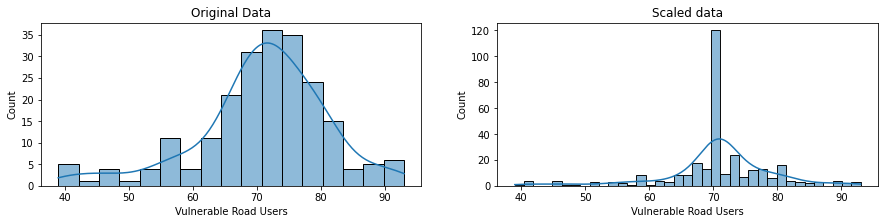

In [422]:
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(df['Vulnerable Road Users'], ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(dfCopy['Vulnerable Road Users'], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

In [423]:
print(df['Vulnerable Road Users'].skew())
print(dfCopy['Vulnerable Road Users'].skew())


-0.7495659039444024
-0.8934288460745293


c:\Users\rayoo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Vulnerable Road Users'>

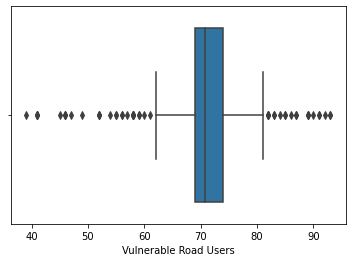

In [424]:
sns.boxplot(dfCopy['Vulnerable Road Users'],orient='h')

c:\Users\rayoo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Vulnerable Road Users'>

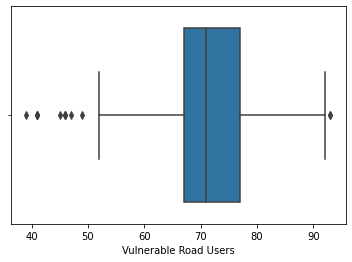

In [425]:
sns.boxplot(df['Vulnerable Road Users'],orient='h')

In [426]:
df['Vulnerable Road Users'].value_counts()

71.0    17
74.0    14
69.0    13
76.0    12
78.0    11
70.0    10
73.0    10
67.0    10
81.0     9
72.0     9
68.0     8
66.0     8
75.0     7
80.0     7
79.0     6
58.0     6
64.0     5
82.0     4
41.0     4
65.0     3
63.0     3
62.0     3
46.0     3
89.0     3
52.0     3
85.0     2
87.0     2
91.0     2
56.0     2
59.0     2
93.0     2
77.0     2
55.0     2
83.0     2
57.0     1
84.0     1
45.0     1
39.0     1
61.0     1
60.0     1
54.0     1
86.0     1
47.0     1
49.0     1
90.0     1
92.0     1
Name: Vulnerable Road Users, dtype: int64

In [427]:
#missing_cat=['Centre Airbag-Driver',  'Centre Airbag-Passenger', 'Centre Airbag-Rear',
       #'AEB Vulnerable Road Users', 'AEB Pedestrian - Reverse',
       #'AEB Car-to-Car']

#imputer = KNNImputer(n_neighbors=5, metric='nan_euclidean')
#dfCopy[['Centre Airbag-Driver']] = imputer.fit_transform(dfCopy[['Centre Airbag-Driver']])
#dfCopy[dfCopy[['Centre Airbag-Driver']].isna()].head(5)


#from sklearn.ensemble import KNNImputer
#imputer = KNNImputer(n_neighbors=5, metric='nan_euclidean')

#df['Centre Airbag-Driver'] = imputer.fit_transform(df['Centre Airbag-Driver']).ravel()


ImportError: cannot import name 'KNNImputer' from 'sklearn.ensemble' (c:\Users\rayoo\anaconda3\lib\site-packages\sklearn\ensemble\__init__.py)

In [430]:
from missingpy import MissForest
imputer = MissForest()
dfCopy['Centre Airbag-Driver'] = imputer.fit_transform(df['Centre Airbag-Driver'])

ModuleNotFoundError: No module named 'missingpy'